In [1]:
# Thanks to   https://github.com/cebarnes/cordic/blob/master/cordic.py
# Sumanta: adding plotting functions for cordic rotation
import math
import time
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def create_tan_table(x):
    tan = {}
    for i in range(x):
        tan[2**(-i)] = math.degrees(math.atan(2**(-i)))
    return tan

def find_angle(t):

    x = t[0]
    y = t[1]
    return math.degrees(math.atan(y/x))


def find_An(n):
    An = math.sqrt(2)
    for i in range(1,n):
        An = An * math.sqrt(1 + 2**(-2*i))
    return An



In [3]:
angle=20
n=40 #no of iterations

In [4]:
x,y = 1.0/find_An(n),0.0
z = float(angle)
str_angle = str(angle)
tan_table = create_tan_table(2*n)



<IPython.core.display.Javascript object>


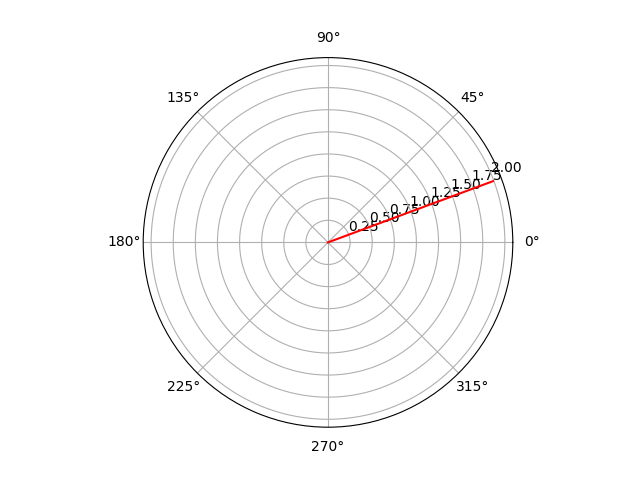

In [5]:
%matplotlib notebook

#plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111,projection='polar')
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi *np.ones(200)
line,=ax.plot(theta, r, 'r-')
plotangle=45
for i in range(n+1):
        if z <= 0:
            di = -1.0
        else:
            di = 1.0
        newx = x - (y * di * 2.0**(-i))
        newy = y + (x * di * 2.0**(-i))
        x = newx
        y = newy
        #print "Z="+str(z)
        
        plotangle=plotangle+z
        theta = (np.pi/180)*plotangle*np.ones(200)
        line.set_xdata(theta)
        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(1)
        z = z - (di * tan_table[2.0**(-i)])
        #print ("cos(angle) = "  + str(x))
        #print ("sin(angle) = "  + str(y))